# Clustering

Vamos a realizar operaciones de **clustering** (segmentación) de datos.
La idea es encontrar una estructura dentro de un dataset donde originalmente no la había.
No se tiene un objetivo de predicción (se trata **aprendizaje no supervisado**), sino de uno de entendimiento de los datos a través del particionamiento del dataset en grupos de instancias.

# Parte 1. K-Means con datos sintéticos

Para poder entender como se utilizan los algoritmos de clustering, vamos inicialmente a crear un dataset sintético con datos ficticios que nos permita ilustrar los aspectos de llamado a los métodos de python.

Vamos a generar y visualizar en un plot 300 puntos aleatorios distribuidos alrededor de 4 centros en un espacio bidimensional, con una desviación estándar de 0.7. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from collections import Counter


from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

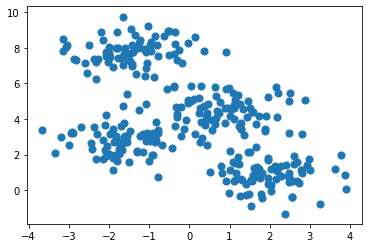

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, grupo = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

En X van a quedar las coordenadas de los puntos y en **grupo** los clusters originales a los que pertencen los datos.

In [3]:
X[0:5]

array([[ 0.43071995,  2.54925795],
       [-1.4687922 ,  7.26767764],
       [ 1.21486062,  5.36489604],
       [-0.94206983,  7.80806619],
       [ 1.01004604,  2.2241682 ]])

In [4]:
grupo[0:5]

array([1, 3, 0, 3, 1])

El algoritmo de K-Means recibe como parámetro el número de clusters que se buscan (hay que sepecificarlo ya que no lo determina automáticamente). Como sabemos que los datos sintéticos se crearon con 4 grupos, vamos a analizar si K-Means los logra detectar.

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
grupo_kmeans = kmeans.predict(X)

Vamos a plotear los clusters encontrados con diferentes colores.

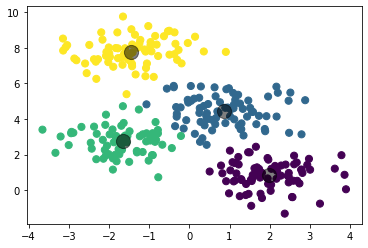

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=grupo_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Ahora comparemos los grupos encontrados con los reales, utilizando una matriz de confusión.

array([[ 0, 75,  0,  0],
       [74,  1,  0,  0],
       [ 0,  3, 72,  0],
       [ 0,  2,  0, 73]], dtype=int64)

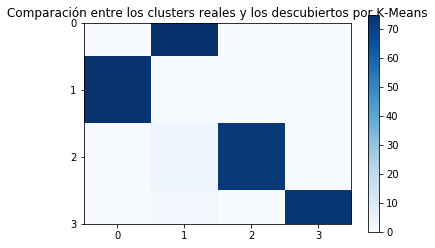

In [7]:
cm = confusion_matrix(grupo, grupo_kmeans)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Comparación entre los clusters reales y los descubiertos por K-Means")
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, ['0','1','2','3'])
plt.yticks(tick_marks, ['0','1','2','3'])
cm

En las filas encontramos los grupos reales y en las columnas los de K-Means. Encontramos 6 errores, todos asociados por k-means al grupo 0 cuando eran de alguno de los otros 3 grupos.

Hay que tener en cuenta que el orden de los nombres de los grupos generados puede no conincidir con el orden de los grupos encontrados por K-Means, como es el caso aquí.

Lo que vemos es que parece haber una concordancia entre los clusters encontrados por K-Means y los reales: los grupos 0, 1, 2 y 3 de k-means corresponden a los grupos 1, 0, 2, y 3 encontrados por K-Means, respectivamente.

Vamos a cambiar el orden de los clusters de k-means para poder entender mejor los resultados

In [8]:
traducir = [1, 0, 2, 3]

grupo_kmeans_reorg = []
for g_k, g in zip(grupo_kmeans, grupo):
    grupo_kmeans_reorg.append(traducir[g_k])
print(grupo_kmeans_reorg)

[0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3, 2, 0, 0, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 0, 0, 1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 0, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2]


Podemos hacer esto de una manera mas breve utilizando una de las particularidades de Python: List comprehensions, que permite resumir operaciones simples realizadas dentro de un ciclo:

In [9]:
grupo_kmeans_reorg = [traducir[g_k] for g_k in grupo_kmeans]
print(grupo_kmeans_reorg)

[0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3, 2, 0, 0, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 0, 0, 1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 0, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2]


In [10]:
cm = confusion_matrix(grupo, grupo_kmeans_reorg)
cm

array([[75,  0,  0,  0],
       [ 1, 74,  0,  0],
       [ 3,  0, 72,  0],
       [ 2,  0,  0, 73]], dtype=int64)

In [12]:
accuracy_score(grupo, grupo_kmeans_reorg)

0.98

Veamos gráficamente cuáles son los registros que se asocian a un grupo diferente a su original.

In [13]:
diferentes = []
for (x0, x1), g, gk in zip(X, grupo, grupo_kmeans_reorg):
    if g!=gk:
        diferentes.append([x0, x1])
        

In [14]:
X[0:5]

array([[ 0.43071995,  2.54925795],
       [-1.4687922 ,  7.26767764],
       [ 1.21486062,  5.36489604],
       [-0.94206983,  7.80806619],
       [ 1.01004604,  2.2241682 ]])

In [15]:
diferentes = np.array(diferentes)

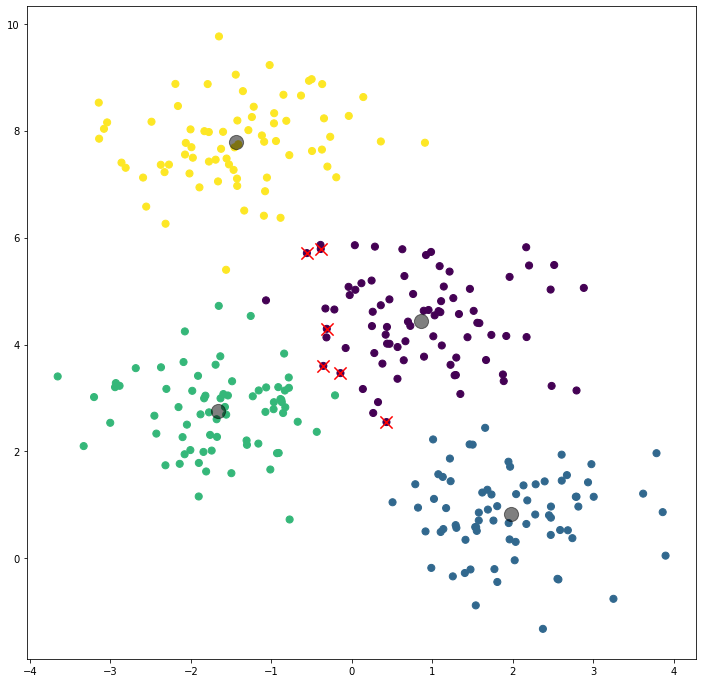

In [16]:
plt.figure(figsize=(12,12))
plt.scatter(X[:, 0], X[:, 1], c=grupo_kmeans_reorg, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.scatter(diferentes[:, 0], diferentes[:, 1], c='red', marker="x", s=150)

**Preguntas**:
Comparamos los grupos creados por el clustering con los originales (esto se llama "clasificación no supervisada")
1. Expliquen la primera matriz de confusión obtenida y el por qué fue necesario recodificar los segmentos obtenidos por el clustering.
2. ¿Qué tan bien puede K-Means encontrar las categorías originales en terminos de accuracy?
3. ¿Tiene sentido crear un test set para un clustering?

# Parte 2. K-Means con datos reales

In [17]:
data = pd.read_csv('01 - ComprasClientes.csv', na_values=".")
print(data.shape)
data.head(5)

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
data.describe(include="all")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


## Preparación de los datos

**¿Qué problemas saltan a la vista al inspeccionar los datos? Arréglenlos. **

...

...

...

...

## Clustering

**Con un k de 3, realice un clustering por K-Means (utilicen random_state=0).**

**Agregue una columna "Cluster" con el segmento correspondiente (0, 1, o 2) al dataset.**

**Con un k de 3, realice un clustering por K-Means (utilicen random_state=0).**

**Agregue una columna al dataset**


El método KMeans en scikit-learn permite definir los valores de ciertos parámetros que controlan la ejecución del algoritmo de clustering. Nos interesan particularmente:
- **n_clusters**: número de clusters que se desean (el parámetro "K"). Por defecto es 8.
- **init**: el método de inicialización de los centroides. Por defecto es "k-means++". Otros valores son "random" o un array con los centroides iniciales
- **n_init**: número de inicializaciones diferentes a ensayar para evitar llegar a un óptimo local. Por defecto es 10
- **max_iter**: Máximo número de iteraciones que se esparará para llegar a convergencia. Por defecto es 300.
- **tol**: tolerancia para determinar que se ha llegado o no a convergenia con respecto a la reducción del WSS (interia). Por defecto es 0.0001
- **random_state**: semilla de inicialización del generador pseudo-aleatorio para poder reproducir los resultados.

El objeto resultado del KMeans después de lanzado el ajuste del algoritmo consta de diferentes valores de salida:
- **cluster_centers_**: los centroides finales de los clusters.
- **labels_**: los clusters a los cuales termina perteneciendo cada instancia del set de aprendizaje.
- **interia_**: el WSS final.
- **n_iter_**: el número de iteraciones que tomó llegar a convergencia.

Podemos utilizar el objeto kmeans resultante como modelo de clasificación, al que a través del método *predict* se le puede enviar un dataset para evaluar y obtener los clusters a los que pertenecen.

...

...

...

...

...